In [5]:
from textfile_data import txt_parser
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mplhep as hep
import boost_histogram as bh
from plot_classes import EmptyPlot

In [6]:
data = txt_parser("tHbb_v31_v3.txt")
data

,1,2,3
0,,,
ATLAS_EG_RESOLUTION,0,+0.976589,-0.976589
ATLAS_EG_SCALE,0,+0.976008,-0.976008
ATLAS_EG_SCALE_AF2,0,+0.976417,-0.976417
ATLAS_EL_ID,0,+0.975801,-0.975801
ATLAS_EL_Isol,0,+0.81224,-0.81224
...,...,...,...
ttlight_PS,0,+0.189193,-0.189193
gamma_stat_SR_bin_9,1,+0.0122391,-0.0122391
tH_NORM,1,+9.32164,-6


In [7]:
class PythPullPlot(EmptyPlot):

    def __init__(self, **kwargs):        

        super().__init__(**kwargs)
        self.create_canvas()
        self.make_grid()
        self.ax = self.make_subplot(0, 1, 0, 1)
        self.set_color() # set default colormap

    def fill(self, obj):
        self.container1d.append(obj)
        self.store_data()
    
    def store_data(self):
        self.values      = [float(self.container1d[0][1][i]) for i in range(len(self.container1d[0]))]
        self.right_bins  = [float(self.container1d[0][2][i]) for i in range(len(self.container1d[0]))]
        self.left_bins   = [float(self.container1d[0][3][i]) for i in range(len(self.container1d[0]))]
        self.data_labels = self.container1d[0].index.to_list()
    
    def pull_plot(self, obj):
        # hep.histplot([self.values, self.right_bins, self.left_bins], stack=True, histtype='fill', orientation='horizontal')
        """
        cannot simply use hep functions so need to manually create the pull plot
        """
        self.config_rcParams({'lines.markersize': 2}) # why does this not work at run time???? (for user)

        yvalues = np.arange(0, len(self.values))
        self.ax.scatter(self.values, yvalues, color='k')
        
        for i, y in enumerate(yvalues):
            self.ax.plot([self.left_bins[i], self.right_bins[i]], [y, y], color='k', lw=0.5)        
        
    def display(self, *save_name):
        self.pull_plot(self.container1d[0])
        
        if save_name:
            self.saveimage(save_name)

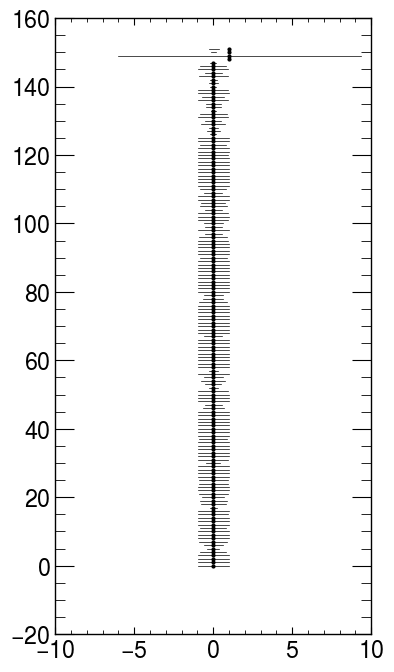

In [8]:
hist1 = PythPullPlot(size=(4,8))
hist1.fill(data)
hist1.display()